In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

from google.colab import drive

In [3]:
file_path = '/content/drive/MyDrive/AML_project/train.csv'

if os.path.exists(file_path):
  drive.mount('/content/drive')
  df_train = pd.read_csv("/content/drive/MyDrive/AML_project/train.csv")
  df_test = pd.read_csv("/content/drive/MyDrive/AML_project/test.csv")
else:
  df_train = pd.read_csv("train.csv")
  df_test = pd.read_csv("test.csv")

In [4]:
print(df_train.shape)
print(df_test.shape)

(1869, 15)
(3, 11)


In [ ]:
print(df_train.head())

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,0,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0
1,1,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify,2142.0,143.0,2142.0,NaN
2,2,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct,1287.0,NaN,1287.0,1073.0
3,3,2377,Recall and use the intersecting diagonals prop...,88,Properties of Quadrilaterals,C,The angles highlighted on this rectangle with ...,acute,obtuse,\( 90^{\circ} \),Not enough information,1180.0,1180.0,NaN,1180.0
4,4,3387,Substitute positive integer values into formul...,67,Substitution into Formula,A,The equation \( f=3 r^{2}+3 \) is used to find...,\( 30 \),\( 27 \),\( 51 \),\( 24 \),NaN,NaN,NaN,1818.0


In [ ]:
print("Missing values in train set:")
print(df_train.isnull().sum())

print("\nMissing values in test set:")
print(df_test.isnull().sum())

Missing values in train set:
QuestionId            0
ConstructId           0
ConstructName         0
SubjectId             0
SubjectName           0
CorrectAnswer         0
QuestionText          0
AnswerAText           0
AnswerBText           0
AnswerCText           0
AnswerDText           0
MisconceptionAId    734
MisconceptionBId    751
MisconceptionCId    789
MisconceptionDId    832
dtype: int64

Missing values in test set:
QuestionId       0
ConstructId      0
ConstructName    0
SubjectId        0
SubjectName      0
CorrectAnswer    0
QuestionText     0
AnswerAText      0
AnswerBText      0
AnswerCText      0
AnswerDText      0
dtype: int64


In [ ]:
rows_with_missing = df_train[df_train.isnull().any(axis=1)]
print("Number of rows with missing values: " + str(rows_with_missing.shape[0]))

missing_rows = df_train[df_train.isnull().any(axis=1)]
print(missing_rows)


Number of rows with missing values: 1869
      QuestionId  ConstructId  \
0              0          856   
1              1         1612   
2              2         2774   
3              3         2377   
4              4         3387   
...          ...          ...   
1864        1864         2774   
1865        1865         2695   
1866        1866          854   
1867        1867         2634   
1868        1868         2680   

                                          ConstructName  SubjectId  \
0     Use the order of operations to carry out calcu...         33   
1     Simplify an algebraic fraction by factorising ...       1077   
2               Calculate the range from a list of data        339   
3     Recall and use the intersecting diagonals prop...         88   
4     Substitute positive integer values into formul...         67   
...                                                 ...        ...   
1864            Calculate the range from a list of data        339   
18

In [ ]:
categorical = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical)

for feature in categorical:
    unique_outcomes = df_train[feature].unique()
    print(str(feature) + ": " + str(unique_outcomes[:5])) #only printing the first 5 just to see


['ConstructName', 'SubjectName', 'CorrectAnswer', 'QuestionText', 'AnswerAText', 'AnswerBText', 'AnswerCText', 'AnswerDText']
ConstructName: ['Use the order of operations to carry out calculations involving powers'
 'Simplify an algebraic fraction by factorising the numerator'
 'Calculate the range from a list of data'
 'Recall and use the intersecting diagonals properties of a rectangle'
 'Substitute positive integer values into formulae involving powers or roots']
SubjectName: ['BIDMAS' 'Simplifying Algebraic Fractions'
 'Range and Interquartile Range from a List of Data'
 'Properties of Quadrilaterals' 'Substitution into Formula']
CorrectAnswer: ['A' 'D' 'B' 'C']
QuestionText: ['\\[\n3 \\times 2+4-5\n\\]\nWhere do the brackets need to go to make the answer equal \\( 13 \\) ?'
 'Simplify the following, if possible: \\( \\frac{m^{2}+2 m-3}{m-3} \\)'
 "Tom and Katie are discussing the \\( 5 \\) plants with these heights:\n\\( 24 \\mathrm{~cm}, 17 \\mathrm{~cm}, 42 \\mathrm{~cm}, 26 \\m

In [ ]:
#Add a row to the mapping misconceptions to handle "no misconceptions", ie the correct answer. Then impute the missing values with this

In [ ]:

df_mapping = pd.read_csv('/content/drive/MyDrive/AML_project/misconception_mapping.csv')

no_misonception = {
    'MisconceptionId': '2587',
    'MisconceptionName': 'No Misconception',
}

no_misonception_df = pd.DataFrame([no_misonception ])
df_mapping= pd.concat([df_mapping, no_misonception_df ], ignore_index=True)

df_mapping.to_csv('/content/drive/MyDrive/AML_project/misconception_mapping.csv', index=False)

In [ ]:
rows_with_multiple_nans = df_train[df_train.isnull().sum(axis=1) > 1]
print(rows_with_multiple_nans.shape)

#This is around 50% :(

(930, 15)


In [ ]:
#Preprocessing (To be done after splitting by question)
df_train = pd.read_csv("/content/drive/MyDrive/AML_project/train.csv")

rows = []
for _, row in df_train.iterrows():
    #These values remain the same, we will copy them in per row
    shared_columns = {
        'QuestionId': row['QuestionId'],
        'ConstructId': row['ConstructId'],
        'ConstructName': row['ConstructName'],
        'SubjectId': row['SubjectId'],
        'SubjectName': row['SubjectName'],
        'CorrectAnswer': row['CorrectAnswer'],
        'QuestionText': row['QuestionText'],
    }

    #Create pairs of answers/misconceptions based on letter
    pairs = zip(['AnswerAText', 'AnswerBText', 'AnswerCText', 'AnswerDText'],['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId'])
    for answer_col, misconception_col in pairs:
        #Copy original data
        row_data = shared_columns.copy()
        #Make an entry for each answer/misconception
        row_data['AnswerText'] = row[answer_col]
        row_data['MisconceptionText'] = row[misconception_col]
        rows.append(row_data)

#Drop entries with NaN as the misconcpetion (i.e quesitons have number of entries equivalent to available misconceptions)
transformed_df = pd.DataFrame(rows).dropna(subset=['MisconceptionText'])
transformed_df.head()



,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerText,MisconceptionText
3,0,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,Does not need brackets,1672.0
4,1,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),2142.0
5,1,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+2 \),143.0
6,1,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m-1 \),2142.0
8,2,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,1287.0


In [6]:
from sklearn.model_selection import train_test_split

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Replace NaN with 'Unknown' or -1
df_train['UnifiedMisconceptionId'] = df_train[['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']].bfill(axis=1).iloc[:, 0].fillna('Unknown')

In [9]:
class_distribution = df_train['UnifiedMisconceptionId'].value_counts()
print("Class distribution:\n", class_distribution)

Class distribution:
 UnifiedMisconceptionId
1214.0    24
1880.0    22
1507.0    17
2316.0    17
1597.0    14
          ..
2135.0     1
986.0      1
2203.0     1
1702.0     1
801.0      1
Name: count, Length: 1026, dtype: int64


In [11]:
underrepresented_classes = class_distribution[class_distribution < 2]
print("Underrepresented classes:\n", underrepresented_classes)

Underrepresented classes:
 UnifiedMisconceptionId
1102.0    1
2160.0    1
1813.0    1
784.0     1
648.0     1
         ..
2135.0    1
986.0     1
2203.0    1
1702.0    1
801.0     1
Name: count, Length: 657, dtype: int64


In [12]:
from sklearn.utils import resample

# Separate the classes
major_classes = df_train[~df_train['UnifiedMisconceptionId'].isin(underrepresented_classes.index)]
minor_classes = df_train[df_train['UnifiedMisconceptionId'].isin(underrepresented_classes.index)]

# Upsample minor classes
minor_classes_upsampled = resample(
    minor_classes,
    replace=True,  # Allow resampling with replacement
    n_samples=2,   # Ensure minimum 2 samples
    random_state=42
)

# Combine back
df_train_balanced = pd.concat([major_classes, minor_classes_upsampled])


In [15]:
class_distribution_b = df_train_balanced['UnifiedMisconceptionId'].value_counts()
print("Class distribution:\n", class_distribution_b)

Class distribution:
 UnifiedMisconceptionId
1214.0    24
1880.0    22
2316.0    17
1507.0    17
1379.0    14
          ..
1981.0     2
1066.0     2
221.0      2
1278.0     1
2261.0     1
Name: count, Length: 371, dtype: int64


In [16]:
underrepresented_classes_b = class_distribution_b[class_distribution_b < 2]
print("Underrepresented classes:\n", underrepresented_classes_b)

Underrepresented classes:
 UnifiedMisconceptionId
1278.0    1
2261.0    1
Name: count, dtype: int64


In [21]:
underrepresented_classes_b_list = [1278.0, 2261.0]
df_train_balanced = df_train_balanced[~df_train_balanced['UnifiedMisconceptionId'].isin(underrepresented_classes_b_list)]

In [22]:
print(df_train_balanced['UnifiedMisconceptionId'].value_counts())

UnifiedMisconceptionId
1214.0    24
1880.0    22
2316.0    17
1507.0    17
1597.0    14
          ..
34.0       2
134.0      2
1287.0     2
991.0      2
673.0      2
Name: count, Length: 368, dtype: int64


In [26]:
# Split the dataset
train, test = train_test_split(
    df_train_balanced,
    stratify=df_train_balanced['UnifiedMisconceptionId'],  # Stratify by misconception
    test_size=0.35,
    random_state=42  # Ensure reproducibility
)

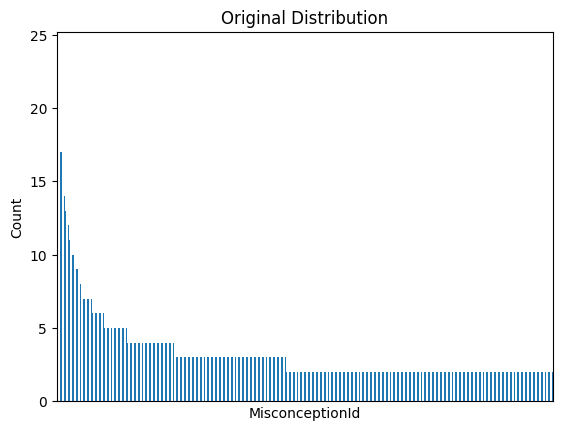

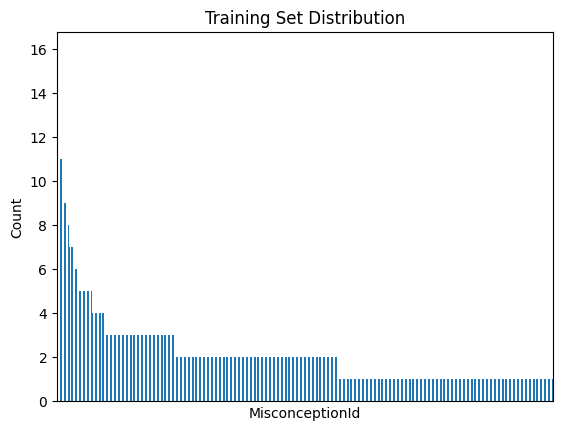

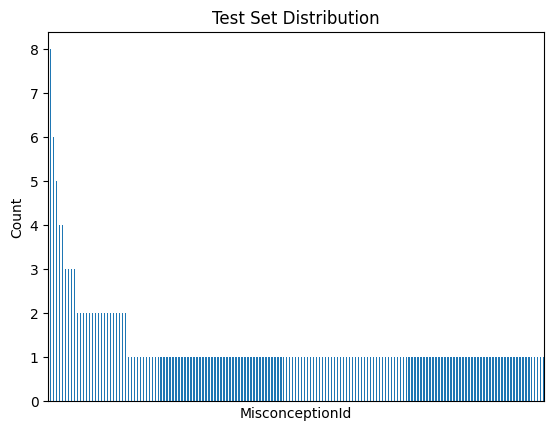

In [29]:
import matplotlib.pyplot as plt

# Visualize the distribution in the original and split datasets
def plot_distribution(data, column, title):
    data[column].value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel('MisconceptionId')
    plt.xticks([])
    plt.ylabel('Count')
    plt.show()

plot_distribution(df_train_balanced, 'UnifiedMisconceptionId', 'Original Distribution')
plot_distribution(train, 'UnifiedMisconceptionId', 'Training Set Distribution')
plot_distribution(test, 'UnifiedMisconceptionId', 'Test Set Distribution')
